# Preprocessing & KMER

In [57]:
import itertools
import numpy as np

<div dir=rtl>

در این بخش تابع kmer برای اعمال به یک رشته پیاده‌سازی شده است.

<br>

حلقه for اول:

به این صورت کار می‌کند که ابتدا k یا همان سایز پنجره‌ را همراه با رشته مورد نظر دریافت می‌کند؛ با توجه با الفبایی که برای رشته‌ها داریم یک دیکشنری از تمام حالت‌های kتایی الفبا ایجاد می‌کند و این دیکشنری را با صفر مقداردهی اولیه می‌کند.

<br>

حلقه for دوم:

سپس در رشته پیمایش می‌کند و در هر مرحله پنجره kتایی  موجود و پیش‌رو را درنظر می‌گیرد.
و برای این پنجره در دیکشنری،‌۱ واحد اضافه می‌کند(در واقع با این کار تعداد هرکدام از پنجره‌های ممکن را در رشته‌ی داده‌شده می‌شمارد)

<br>

حلقه for سوم:

نهایتا در حلقه سوم مقادیر دیکشنری، تقسیم بر تعداد کل پنجره‌های ممکن می‌شوند و به این صورت نرمال‌سازی می‌شوند و اثر طول خنثی می‌شود.

</div>

In [58]:
def kmer_for_one_sequence(seq, k):
    number_of_windows = len(seq) - k + 1
    kmers = {}

    alphabet = ['A', 'C', 'G', 'T']
    products = [''.join(p) for p in itertools.product(alphabet, repeat=k)]
    for product in products:
        record = ''.join(product)
        kmers[record] = 0
    # print(kmers)

    for i in range(number_of_windows):
        current_window = seq[i:i + k]
        # print('window:', current_window)
        kmers[current_window] += 1

    if number_of_windows:
        for record in kmers:
            kmers[record] = kmers[record] / number_of_windows
    return kmers

<div dir=rtl>

این تابع  kmer را بر روی مجموعه‌ای از رشته‌ها اعمال می‌کند.

همانطور که در کد مشخص است بر روی مجموعه داده ورودی پیمایش میکند و index و row را برای هر سر استخراج می‌کند و رشته را از داخل row بدست می‌آورد.

و تابع kmer_for_one_sequence را برروی هر رشته اعمال می‌کند و آن رشته‌را با برداری که از تابع قبلی بدست می‌آید جایگزین می‌کند.

<br>
(
  چک می‌کند که:

اگر طول row بیش‌تر از ۱ بود: داده‌ی آموزشی است که هم Type دارد و هم Sequence

 درغیر این صورت: داده‌ی تست که فقط Sequence دارد.

 به این صورت رشته را پیدا می‌کند)


<br>
نهایتا رشته‌های ما با یکسری بردار عددی نرمال‌شده، جایگزین می‌شوند.

<div>

In [59]:
def kmer(k, data):
    for index, row in data.iterrows():
        if len(row) > 1:
          updated_data = kmer_for_one_sequence(row[1], k)
          # row[1] = np.array(list(updated_data.values()))
          row[1] = list(updated_data.values())
        else:
          updated_data = kmer_for_one_sequence(row[0], k)
          row[0] = list(updated_data.values())

In [60]:
out = kmer_for_one_sequence('ATCGAGC', 2)
print(list(out.values()))

[0.0, 0.0, 0.16666666666666666, 0.16666666666666666, 0.0, 0.0, 0.16666666666666666, 0.0, 0.16666666666666666, 0.16666666666666666, 0.0, 0.0, 0.0, 0.16666666666666666, 0.0, 0.0]


## Train set preprocess


### Reading the Training dataset:


In [67]:
import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

train_set = pd.read_csv("training_set.csv")
train_set

,Type,Sequence
0,Class5,TACCACCTACGCTGACAATGGATGTTATTGTACCCGATTCGAATTA...
1,Class5,TGTTTATGTATCCGCCCATAAATAGCTTAGCGTTGACTACCGCTTG...
2,Class3,TCAATATAGGCCACGGGCAACCCGTTGATATTTTGTGTGACGGTTG...
3,Class6,TAGTTTTAGTAACGTTCCTCTCCGTTCTCAATTTATTCTTTTATTG...
4,Class2,TCGCGTGCCGGGGCGACCGCGCCAGTATTGCCCATCCCCTTGATTG...
...,...,...
1315,Class5,TACCACCTACGCTGACAATGGATGTTATTGTACCCGTTTCGAATTA...
1316,Class6,TAGTTTTAGTAAGTTTGGTCCCATTCAATCACGTTCGGATGCGCTG...
1317,Class1,GCTGGGTAATTTTAGGTTGGTTGGCGATCGCGCCACTATCGCACCG...
1318,Class5,TACCACCTACGCTGACAATGGATGTTATTGTACCCGATTCGAATTA...



### Update Labels by replacing Class# with numbers:


<div dir = rtl>
برچسب‌ها را با مقادیر عددیشان جایگزین می‌کنیم تا بتوان در مدل از آن‌ها استفاده کرد
</div>

In [68]:
train_set.iloc[:, 0:1] = train_set.iloc[:, 0:1].replace('Class1', 1)
train_set.iloc[:, 0:1] = train_set.iloc[:, 0:1].replace('Class2', 2)
train_set.iloc[:, 0:1] = train_set.iloc[:, 0:1].replace('Class3', 3)
train_set.iloc[:, 0:1] = train_set.iloc[:, 0:1].replace('Class4', 4)
train_set.iloc[:, 0:1] = train_set.iloc[:, 0:1].replace('Class5', 5)
train_set.iloc[:, 0:1] = train_set.iloc[:, 0:1].replace('Class6', 6)

train_set

,Type,Sequence
0,5,TACCACCTACGCTGACAATGGATGTTATTGTACCCGATTCGAATTA...
1,5,TGTTTATGTATCCGCCCATAAATAGCTTAGCGTTGACTACCGCTTG...
2,3,TCAATATAGGCCACGGGCAACCCGTTGATATTTTGTGTGACGGTTG...
3,6,TAGTTTTAGTAACGTTCCTCTCCGTTCTCAATTTATTCTTTTATTG...
4,2,TCGCGTGCCGGGGCGACCGCGCCAGTATTGCCCATCCCCTTGATTG...
...,...,...
1315,5,TACCACCTACGCTGACAATGGATGTTATTGTACCCGTTTCGAATTA...
1316,6,TAGTTTTAGTAAGTTTGGTCCCATTCAATCACGTTCGGATGCGCTG...
1317,1,GCTGGGTAATTTTAGGTTGGTTGGCGATCGCGCCACTATCGCACCG...
1318,5,TACCACCTACGCTGACAATGGATGTTATTGTACCCGATTCGAATTA...


### Updating data by replacing sequences with KMER vectors:


<div dir = rtl>
kmer را برروی رشته‌ها اعمال می‌کنیم و به این صورت بردارهای kmer متناظرشان را جایگزین می‌کنیم.

در بخش‌های مختلف کد از k=2 برای پیاده‌سازی kmer استفاده شده.
این مقدار از تست مقادیر مختلف بدست آمده و نتیجه شده.
درواقع مدل شبکه عصبی که ایجاد کردیم با چند مقدار مختلف k ننتیجه مناسب را می‌دهد اما k=2 برای مدل mlp ما از بقیه بهتر بود. درواقع این برتری زمانی مشخص شد که یک شبکه عصبی ساده با تعداد پارامترها و نورون‌های کم داشتیم.  در تست‌های مکرر حالت‌های مختلف و مقادیر مختلف k مشاهده شد که در یک شبکه عصبی سبک با افزایش k درصد خطا برروی داده‌های develop افزایش می‌یابد . اما با k=2 شبکه ی ساده‌ی ما می‌توانست درصد زیادی از داده‌های ارزیابی را درست تشخیص دهد و فقط تعداد کمی‌ را با تفاوت تنها ۱واحد متفاوت تشخیص می‌داد. اما با افزایش k مقدار خطا بیش‌تر و بزرگ‌تر می‌شد.
(علت این امر هم این است که پنجره های کوچک‌تر زیربخش‌های بیش‌تری از رشته‌ها را بررسی می‌کنند و به عبارتی جزئی تر رشته را بررسی می‌کنند. این مطلب را می‌توان با درکنار هم قرار دادن یک k خیلی کوچک و یک k خیلی بزرگ به خوبی درک کرد)
</div>

In [69]:
kmer(k=2, data=train_set)

train_set

,Type,Sequence
0,5,"[0.07471585615800261, 0.04713992919694429, 0.0..."
1,5,"[0.0692064083457526, 0.043964232488822655, 0.0..."
2,3,"[0.03645266594124048, 0.06641050054406965, 0.0..."
3,6,"[0.0641025641025641, 0.05042735042735043, 0.03..."
4,2,"[0.0406379797308523, 0.07057650772553581, 0.04..."
...,...,...
1315,5,"[0.07480901807341159, 0.04592882429662754, 0.0..."
1316,6,"[0.05897435897435897, 0.03333333333333333, 0.0..."
1317,1,"[0.040444308153599784, 0.06283007938941701, 0...."
1318,5,"[0.07406372275013974, 0.04490404322712875, 0.0..."


### Extract data and labels from new dataset:

<div dir = rtl>
مجموعه‌داده و برچسب‌های آموزشی را در پارامترهای train_data و train_label میریزیم.
</div>

In [70]:
train_data = train_set.iloc[:, 1:2]
train_labels = train_set.iloc[:, 0:1]

train_data

,Sequence
0,"[0.07471585615800261, 0.04713992919694429, 0.0..."
1,"[0.0692064083457526, 0.043964232488822655, 0.0..."
2,"[0.03645266594124048, 0.06641050054406965, 0.0..."
3,"[0.0641025641025641, 0.05042735042735043, 0.03..."
4,"[0.0406379797308523, 0.07057650772553581, 0.04..."
...,...
1315,"[0.07480901807341159, 0.04592882429662754, 0.0..."
1316,"[0.05897435897435897, 0.03333333333333333, 0.0..."
1317,"[0.040444308153599784, 0.06283007938941701, 0...."
1318,"[0.07406372275013974, 0.04490404322712875, 0.0..."


<div dir = rtl>

داد‌ه‌ها و برچسب را به صورت لیست در‌می‌آوریم تا در مدل بتوانیم استفاده کنیم.

</div>

In [71]:
train_data = list(train_data['Sequence'])
train_labels = list(train_labels['Type'])

print(train_data)
print(train_labels)

[[0.07471585615800261, 0.04713992919694429, 0.04574250046580958, 0.09288242966275387, 0.07881498043599776, 0.05030743432084964, 0.045183528973355695, 0.03987329979504379, 0.022917831190609278, 0.04993478665921371, 0.048071548351034096, 0.08505682876839948, 0.08403204769890069, 0.06689025526364822, 0.0669834171790572, 0.1014533258803801], [0.0692064083457526, 0.043964232488822655, 0.04517511177347243, 0.09295827123695977, 0.07386363636363637, 0.048342026825633384, 0.04694485842026826, 0.039959016393442626, 0.021423248882265277, 0.04992548435171386, 0.048714605067064085, 0.08699701937406855, 0.0868107302533532, 0.06687779433681074, 0.06631892697466468, 0.11251862891207154], [0.03645266594124048, 0.06641050054406965, 0.0389689880304679, 0.05389689880304679, 0.08698313384113167, 0.10823585418933623, 0.047028019586507076, 0.07960418933623503, 0.014213819368879216, 0.06967491838955386, 0.029549782372143635, 0.06987894450489662, 0.058113438520130574, 0.07752992383025027, 0.06777067464635474, 

## Develope set preprocess

### Reading the Develop dataset:


In [72]:
development_set = pd.read_csv("development_set.csv")
development_set

,Type,Sequence
0,Class5,GACCCGTAGTCTCCATTTAAGACTCCCGCGAGGCCCCCGGACCAAC...
1,Class2,GCCCATCCCCTTGATTGCCTTTCTTTTAGGGCACCACCCTAGACTC...
2,Class2,GGGCGACCGCGCCAGTATTGCCCATCCCCTTGATTGCCTTTCTTTT...
3,Class6,TAGATTTAGTAAGTTTGGTCCCATTCAATCACGTTCGGATGCCCTG...
4,Class3,TCCTTTAACCCTCTGGCCGGGTAACTTGTTTGGTTGGTTGCCCGAT...
...,...,...
175,Class2,TCGCGTGCCGGGGCGACCGCGCCAGTATTGCCCATCCCCTTGATTG...
176,Class6,AACGTTTCTCTCCGTACTCAATTTATTCTTTTATTGCTGAATTGGC...
177,Class1,TCTCCTAACCCCCTGGCTGGGTAATTTTAGGTTGGTTGGCGATCGC...
178,Class1,GCGATCGCGCCACTATCGCACCGCGCTTTGATTGCCCTTTTCGCAC...



### Update Labels by replacing Class# with numbers:


<div dir = rtl>
برچسب‌ها را با مقادیر عددیشان جایگزین می‌کنیم تا بتوان در مدل از آن‌ها استفاده کرد
</div>

In [73]:
development_set.iloc[:, 0:1] = development_set.iloc[:, 0:1].replace('Class1', 1)
development_set.iloc[:, 0:1] = development_set.iloc[:, 0:1].replace('Class2', 2)
development_set.iloc[:, 0:1] = development_set.iloc[:, 0:1].replace('Class3', 3)
development_set.iloc[:, 0:1] = development_set.iloc[:, 0:1].replace('Class4', 4)
development_set.iloc[:, 0:1] = development_set.iloc[:, 0:1].replace('Class5', 5)
development_set.iloc[:, 0:1] = development_set.iloc[:, 0:1].replace('Class6', 6)

development_set

,Type,Sequence
0,5,GACCCGTAGTCTCCATTTAAGACTCCCGCGAGGCCCCCGGACCAAC...
1,2,GCCCATCCCCTTGATTGCCTTTCTTTTAGGGCACCACCCTAGACTC...
2,2,GGGCGACCGCGCCAGTATTGCCCATCCCCTTGATTGCCTTTCTTTT...
3,6,TAGATTTAGTAAGTTTGGTCCCATTCAATCACGTTCGGATGCCCTG...
4,3,TCCTTTAACCCTCTGGCCGGGTAACTTGTTTGGTTGGTTGCCCGAT...
...,...,...
175,2,TCGCGTGCCGGGGCGACCGCGCCAGTATTGCCCATCCCCTTGATTG...
176,6,AACGTTTCTCTCCGTACTCAATTTATTCTTTTATTGCTGAATTGGC...
177,1,TCTCCTAACCCCCTGGCTGGGTAATTTTAGGTTGGTTGGCGATCGC...
178,1,GCGATCGCGCCACTATCGCACCGCGCTTTGATTGCCCTTTTCGCAC...


### Updating data by replacing sequences with KMER vectors:


<div dir = rtl>
kmer را برروی رشته‌ها اعمال می‌کنیم و به این صورت بردارهای kmer متناظرشان را جایگزین می‌کنیم.
</div>

In [74]:
kmer(k=2, data=development_set)

development_set

,Type,Sequence
0,5,"[0.06901910595118384, 0.04333120029253131, 0.0..."
1,2,"[0.04082651227789978, 0.07050642177413988, 0.0..."
2,2,"[0.0408625804086258, 0.07075959070759591, 0.04..."
3,6,"[0.05811965811965812, 0.03632478632478633, 0.0..."
4,3,"[0.03651929636813591, 0.0665841749715738, 0.03..."
...,...,...
175,2,"[0.04073901774440088, 0.07041270685186415, 0.0..."
176,6,"[0.061802575107296136, 0.051072961373390555, 0..."
177,1,"[0.04037025776156211, 0.06297084557954123, 0.0..."
178,1,"[0.04057746146321719, 0.06307552197524201, 0.0..."


### Extract data and labels from new dataset:

<div dir = rtl>
مجموعه‌داده و برچسب‌های develop را در پارامترهای develop_data و develop_label میریزیم.
</div>

In [75]:
development_data = development_set.iloc[:, 1:2]
development_labels = development_set.iloc[:, 0:1]

development_data = list(development_data['Sequence'])
development_labels = np.array(list(development_labels['Type']))

print(development_data)
print(development_labels)

[[0.06901910595118384, 0.04333120029253131, 0.045250937014352316, 0.09397568333485694, 0.07404698784166742, 0.052198555626656915, 0.04753633787366304, 0.04095438339884816, 0.02221409635250023, 0.053112715970381204, 0.04506810494560746, 0.08547399213822104, 0.08629673644757291, 0.06609379285126611, 0.06792211353871469, 0.10750525642197642], [0.04082651227789978, 0.07050642177413988, 0.04914487256272044, 0.04897850535702402, 0.08987156451720237, 0.10328076129633326, 0.05636520928994477, 0.07672855526718574, 0.023657416650029947, 0.07646236773807147, 0.03816463698675717, 0.06391828042856192, 0.05510081852665202, 0.07599653956212152, 0.05852798296399814, 0.07246955480135756], [0.0408625804086258, 0.07075959070759591, 0.048795120487951205, 0.048761790487617904, 0.08955771089557711, 0.10335633103356331, 0.0565943405659434, 0.07675899076758991, 0.0238309502383095, 0.07625904076259041, 0.038162850381628505, 0.0640269306402693, 0.054927840549278406, 0.07589241075892411, 0.058694130586941305, 0.

## Test set preprocess

### Reading the Test dataset:


In [76]:
test_set = pd.read_csv("test_set.csv")
test_set

,Sequence
0,TACTACCTACGCTGACAATGGATGTTATTGTACCCGATTCGAATTA...
1,TACTACCTACGCTGACAATGGATGTTATTGTACCCGATTCGAATTA...
2,TCCTTTAACCCTCTGGCCGGGTAACTTGTTTGGTTGGTTGCCCGAT...
3,TCTCCTAACCCCCTGGCTGGGTAATTTTAGGTTGGTTGGCGATCGC...
4,GTTTGGTCCCATTCAATCACGTTCGGATGCGCTGCACCGCCTTTTA...
...,...
395,GTAATTTTAGGTTGGTTGGCGATCGCGCCACTATCGCACCGCGCTT...
396,GTTTGGTTGGTTGCCCGATCGCGCCACTATCGCACCGCGCTTTGAT...
397,ATCCCTTACATTCTAGCCAAGCTCGCGTGCCCGGGCGACCGCGCCA...
398,TACTACCTACGCTGACAATGGATGTTATTGTACCCGATTCGAATTA...


### Updating data by replacing sequences with KMER vectors:


<div dir = rtl>
kmer را برروی رشته‌ها اعمال می‌کنیم و به این صورت بردارهای kmer متناظرشان را جایگزین می‌کنیم.
</div>

In [77]:
kmer(k=2, data=test_set)

test_set

,Sequence
0,"[0.07295257616696171, 0.045467250535730926, 0...."
1,"[0.07313891735768191, 0.04565359172645113, 0.0..."
2,"[0.036527387170215614, 0.0666599705370296, 0.0..."
3,"[0.04068320893013247, 0.06317665254522224, 0.0..."
4,"[0.06349892008639309, 0.03326133909287257, 0.0..."
...,...
395,"[0.040524152799299336, 0.06299265647106381, 0...."
396,"[0.03653594990120893, 0.06657513144234956, 0.0..."
397,"[0.040634752008498774, 0.07051324613239493, 0...."
398,"[0.07397056083473076, 0.045183528973355695, 0...."


### Extract data as a list:

<div dir = rtl>
مجموعه‌داده test را در پارامتر test_data    میریزیم و به قالب لیست در‌می‌آوریم تا بتوان در پیش‌بینی با مدل استفاده کرد.
</div>

In [78]:
test_data = test_set.iloc[:, :]

test_data = list(test_data['Sequence'])
print(test_data)


[[0.07295257616696171, 0.045467250535730926, 0.047703344824373425, 0.0923320600018634, 0.07844964129320786, 0.050684803875896765, 0.04425603279604957, 0.04136774433988633, 0.024038013602906923, 0.05115065685269729, 0.048541880182614364, 0.08264231808441255, 0.08301500046585297, 0.06754868163607565, 0.06587161091959377, 0.10397838442187646], [0.07313891735768191, 0.04565359172645113, 0.04751700363365322, 0.09223888940650331, 0.07844964129320786, 0.05003260970837604, 0.04453554458212988, 0.04155408553060654, 0.023944843007546818, 0.0513369980434175, 0.047889686015093635, 0.08301500046585297, 0.08301500046585297, 0.06764185223143576, 0.0662442933010342, 0.10379204323115625], [0.036527387170215614, 0.0666599705370296, 0.03907191643230213, 0.05393732422659703, 0.08671487880005357, 0.107774206508638, 0.047241194589527254, 0.0795500200883889, 0.014698004553368154, 0.0696062675773403, 0.029697334940404448, 0.06980715146645239, 0.05825632784250703, 0.07723985536359984, 0.06779831257533146, 0.09

# MLP

<div dir = rtl>
در این بخش مدل را تشکیل می‌دهیم و آموزش و develop و تست را پیاده‌سازی می‌کنیم و نتایج را بررسی می‌کنیم.
</div>

## Develop set Prediction

### Create & Train MLP model:

<div dir = rtl>
ابتدا یک مدل دسته‌بندی MLP ایجاد می‌کنیم.
این مدل ۳لایه پنهان دارد که هرکدام ۶۴ نورون دارند.
از تابع فعال‌ساز relu استفاده شده‌است که غشبکه مارا غیرخطی می‌کند.رندم استیت هسته‌ی شروع و مقداردهی رندم اولیه پارامترها را تعیین می‌کند و مکس ایتر هم حداکثر تعداد پیمایش‌ها را تعیین می‌کند.

این مقادیر پارامترها باتوجه به توزیع داده‌ها خوب عمل می‌کنند و با تست و تحلیل محاسبه شده‌اند.
برای برخی از پارامتر‌ها مقدار اتیمم وجود دارد به این صورت که بیش‌تر یا کم‌تر از یک مقدار خاص، عملکرد مدل کاهشی ‌می‌شود و ما با پیدا کردن آن نقطه خاص ‌می‌توانیم عملکرد مناسب مدل را بدست ‌بیاوریم.

در مورد k در kmer هم به همین شکل اقدام شد که توضیح داده ‌می‌شود.

<br>
نهایتا داد‌های آموزشی همراه با برچسب‌هایشان در مدل فیت شدند و مدل با آن‌ها آموزش می‌بیند.
</div>

In [79]:
from sklearn.neural_network import MLPClassifier

# clf = MLPClassifier(hidden_layer_sizes=(40, 40, 40), activation="relu")
clf = MLPClassifier(hidden_layer_sizes=(64,64,64),activation="relu" ,random_state=1, max_iter=2000)
# clf = MLPClassifier(hidden_layer_sizes=(70, 130, 70), random_state=1, activation="relu", max_iter=2000)

clf.fit(train_data, train_labels)

MLPClassifier(hidden_layer_sizes=(64, 64, 64), max_iter=2000, random_state=1)

### Predict develop dataset with MLP model & show the Result and Score:

<div dir = rtl>

حال داده‌های develop را به مدل می‌دهیم تا پیش‌بینی کند و نتایج را نشان می‌دهیم.
</div>

In [81]:
development_predicts = clf.predict(development_data)

print(development_predicts)

[5 2 2 6 3 6 3 5 1 6 5 6 6 2 6 5 2 5 5 3 4 2 4 6 3 2 3 5 4 5 4 3 5 2 1 1 5
 2 2 5 6 1 6 1 1 3 5 5 5 4 1 6 1 3 1 6 6 1 3 4 2 4 2 2 4 6 1 1 3 1 3 1 3 1
 5 1 5 2 4 4 2 4 1 2 6 6 2 3 6 5 6 4 4 6 4 2 4 5 5 3 1 3 5 2 5 4 3 2 6 3 1
 3 6 6 1 2 3 3 4 2 5 4 2 3 4 2 1 5 4 6 4 4 4 6 1 4 3 2 6 2 1 2 3 2 3 4 3 6
 5 6 4 4 5 1 5 4 3 1 6 4 3 6 5 5 5 5 3 1 2 4 3 3 1 2 6 2 6 1 1 1]


<div dir = rtl>

سپس تفاوت نتایج پیش‌بینی شده‌ی مدل را با مقادیر واقعی نشان می‌دهیم که برای همه داده‌های develop برابر صفر است و یعنی مدل عملکرد ۱۰۰ درصدی از خود نشان داده‌است.

این امتیاز هم در همین بخش با r2_score محاسبه و نمایش داده‌شده است.

</div>

In [132]:
from sklearn.metrics import r2_score
print(development_predicts - development_labels)
print("\nThe Score with ", (r2_score(development_predicts, development_labels)))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

The Score with  1.0


## Test set Prediction

### Create & Train MLP model:

<div dir = rtl>
ابتدا یک مدل دسته‌بندی MLP ایجاد می‌کنیم.
این مدل ۳لایه پنهان دارد که هرکدام ۶۴ نورون دارند.
از تابع فعال‌ساز relu استفاده شده‌است که غشبکه مارا غیرخطی می‌کند.رندم استیت هسته‌ی شروع و مقداردهی رندم اولیه پارامترها را تعیین می‌کند و مکس ایتر هم حداکثر تعداد پیمایش‌ها را تعیین می‌کند.

این مقادیر پارامترها باتوجه به توزیع داده‌ها خوب عمل می‌کنند و با تست و تحلیل محاسبه شده‌اند.
برای برخی از پارامتر‌ها مقدار اتیمم وجود دارد به این صورت که بیش‌تر یا کم‌تر از یک مقدار خاص، عملکرد مدل کاهشی ‌می‌شود و ما با پیدا کردن آن نقطه خاص ‌می‌توانیم عملکرد مناسب مدل را بدست ‌بیاوریم.

در مورد k در kmer هم به همین شکل اقدام شد که توضیح داده ‌می‌شود.

<br>
نهایتا داد‌های آموزشی همراه با برچسب‌هایشان در مدل فیت شدند و مدل با آن‌ها آموزش می‌بیند.
</div>

In [128]:
clf = MLPClassifier(hidden_layer_sizes=(64, 64, 64),activation="relu" ,random_state=1,  max_iter=2000)

clf.fit(train_data, train_labels)

MLPClassifier(hidden_layer_sizes=(64, 64, 64), max_iter=2000, random_state=1)

In [50]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

# X_train, X_test, y_train, y_test = train_test_split(train_data,train_labels,random_state=1, test_size=0.2)
# sc_X = StandardScaler()
# X_trainscaled=sc_X.fit_transform(X_train)
# X_testscaled=sc_X.transform(X_test)

In [51]:
# clf = MLPClassifier(hidden_layer_sizes=(5),activation="relu",random_state=1).fit(X_trainscaled, y_train)
# y_pred=clf.predict(X_testscaled)
# print(clf.score(X_testscaled, y_test))

### Predict Test dataset with MLP model & show the Result:

<div dir = rtl>

حال داده‌های test را به مدل می‌دهیم تا پیش‌بینی کند.

سپس  نتایج پیش‌بینی شده‌ی مدل را  نشان می‌دهیم .

</div>

In [129]:
test_predicts = clf.predict(test_data)

print("answers =\n", (test_predicts))

answers =
 [5 5 3 1 6 1 6 3 4 1 4 3 2 4 4 3 6 3 3 3 4 1 5 6 1 5 3 3 3 3 1 3 6 1 6 1 3
 5 5 6 5 4 5 5 3 6 4 5 1 2 4 3 4 3 3 6 1 6 5 3 1 3 3 3 3 6 4 5 6 6 6 3 2 6
 1 1 4 6 6 2 5 4 1 1 3 5 6 4 3 5 3 1 1 6 5 3 5 1 4 1 3 3 2 1 3 4 3 3 3 3 3
 1 4 1 4 4 3 3 3 4 6 1 6 4 5 3 6 2 1 3 3 6 5 2 2 3 2 1 3 3 5 1 6 1 2 2 1 3
 1 1 6 6 2 6 3 5 5 3 6 3 1 2 4 4 3 3 5 4 1 1 2 3 6 1 3 2 6 4 5 6 5 6 5 5 6
 3 3 3 6 4 6 3 3 6 6 6 1 1 5 1 1 3 3 1 1 1 5 3 2 2 1 1 1 1 3 6 3 3 4 5 6 4
 1 4 3 4 6 5 4 6 5 5 6 6 4 5 3 6 6 3 1 1 4 4 4 5 1 2 6 1 6 3 2 2 1 2 3 6 6
 5 1 3 6 1 3 3 1 1 5 4 1 3 1 2 1 1 3 3 3 6 1 6 4 1 3 4 3 3 4 3 1 3 6 6 2 1
 6 2 1 6 6 1 4 1 6 5 6 3 4 2 4 3 1 6 5 5 2 3 5 4 5 1 3 3 4 1 1 1 1 2 1 5 2
 3 3 4 2 5 1 5 4 1 1 3 3 2 5 4 4 3 2 5 1 2 1 2 1 2 2 3 5 6 1 6 3 1 6 4 1 1
 1 2 3 5 6 3 1 1 4 2 1 6 3 6 3 4 2 6 6 3 3 2 2 6 3 1 3 2 5 1]


<div dir = rtl>
<font size = 5>

با توجه به نتایجی که از quera بدست آمد می‌بینیم مدل ما عملکرد بسیار بالا و تقریبا ۱۰۰ درصدی دارد که نشان می‌دهد پیش پردازش، نرمال‌سازی، ساخت و استفاده از مدل به خوبی صورت گرفته است.

</font>

</div>

### res

In [90]:
answers = [5, 5, 3, 1, 6, 1, 6, 3, 4, 1, 4, 3, 2, 4, 4, 3, 6, 3, 3, 3, 4, 1, 5, 6, 1, 5, 3, 3, 3, 3, 1, 3, 6, 1, 6, 1,
           3, 5, 5, 6,
           5, 4, 5, 5, 3, 6, 4, 5, 1, 2, 4, 3, 4, 3, 3, 6, 1, 6, 5, 3, 1, 3, 3, 3, 3, 6, 4, 5, 6, 6, 6, 3, 2, 6, 1, 1,
           4, 6, 6, 2,
           5, 4, 1, 1, 3, 5, 6, 4, 3, 5, 3, 1, 1, 6, 5, 3, 5, 1, 4, 1, 3, 3, 2, 1, 3, 4, 3, 3, 3, 3, 3, 1, 4, 1, 4, 4,
           3, 3, 3, 4,
           6, 1, 6, 4, 5, 3, 6, 2, 1, 3, 3, 6, 5, 2, 2, 3, 2, 1, 3, 3, 5, 1, 6, 1, 2, 2, 1, 3, 1, 1, 6, 6, 2, 6, 3, 5,
           5, 3, 6, 3,
           1, 2, 4, 4, 3, 3, 5, 4, 1, 1, 2, 3, 6, 1, 3, 2, 6, 4, 5, 6, 5, 6, 5, 5, 6, 3, 3, 3, 6, 4, 6, 3, 3, 6, 6, 6,
           1, 1, 5, 1,
           1, 3, 1, 1, 1, 1, 5, 3, 2, 2, 1, 1, 1, 1, 3, 6, 3, 3, 4, 5, 6, 4, 1, 4, 3, 4, 6, 5, 4, 6, 5, 5, 6, 6, 4, 5,
           3, 6, 6, 3,
           1, 1, 4, 4, 4, 5, 1, 2, 6, 1, 6, 3, 2, 2, 1, 2, 3, 6, 6, 5, 1, 3, 6, 1, 3, 3, 1, 1, 5, 4, 1, 3, 1, 2, 1, 1,
           3, 3, 3, 6,
           1, 6, 4, 1, 3, 4, 3, 3, 4, 3, 1, 3, 6, 6, 2, 1, 6, 2, 1, 6, 6, 1, 4, 1, 6, 5, 6, 3, 4, 2, 4, 3, 1, 6, 5, 5,
           2, 3, 5, 4,
           5, 1, 3, 3, 4, 1, 1, 1, 1, 2, 1, 5, 2, 3, 3, 4, 2, 5, 1, 5, 4, 1, 1, 3, 3, 2, 5, 4, 4, 3, 2, 5, 1, 2, 1, 2,
           1, 2, 2, 3,
           5, 6, 1, 6, 3, 1, 6, 4, 1, 1, 1, 2, 3, 5, 6, 3, 1, 1, 4, 2, 1, 6, 3, 6, 3, 4, 2, 6, 6, 3, 3, 2, 2, 6, 3, 1,
           3, 2, 5, 1]

answers = np.array(list(answers))

In [130]:
from sklearn.metrics import r2_score
print(test_predicts - answers)
print("\nThe Score with ", (r2_score(test_predicts, answers)))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

The Score with  0.9967408065281645


# CNN

In [322]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [321]:
my_optimizer = tf.keras.optimizers.Adam(0.001)
my_optimizer.learning_rate.assign(0.01)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=0.01>

Epoch 1/200
83/83 [==============================] - 1s 4ms/step - loss: 1.9870 - accuracy: 0.1652
Epoch 2/200
83/83 [==============================] - 1s 8ms/step - loss: 0.4111 - accuracy: 0.1667
Epoch 3/200
83/83 [==============================] - 0s 2ms/step - loss: 0.3681 - accuracy: 0.1667
Epoch 4/200
83/83 [==============================] - 0s 2ms/step - loss: 0.3138 - accuracy: 0.1667
Epoch 5/200
83/83 [==============================] - 0s 2ms/step - loss: 0.2962 - accuracy: 0.1667
Epoch 6/200
83/83 [==============================] - 0s 2ms/step - loss: 0.2960 - accuracy: 0.1667
Epoch 7/200
83/83 [==============================] - 0s 2ms/step - loss: 0.2778 - accuracy: 0.1667
Epoch 8/200
83/83 [==============================] - 0s 2ms/step - loss: 0.2440 - accuracy: 0.1667
Epoch 9/200
83/83 [==============================] - 0s 2ms/step - loss: 0.2660 - accuracy: 0.1667
Epoch 10/200
83/83 [==============================] - 0s 2ms/step - loss: 0.2342 - accuracy: 0.1667
Epoch 11/

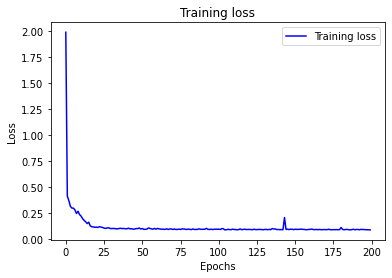

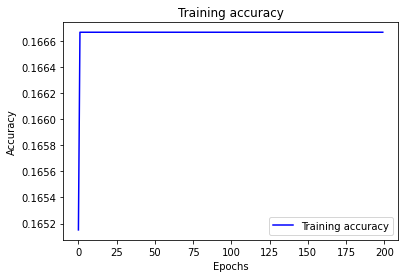

In [331]:
ann6 = tf.keras.models.Sequential()
ann6.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann6.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann6.add(tf.keras.layers.Dense(units=1, activation='relu'))

ann6.compile(optimizer=my_optimizer, loss='mean_squared_error', metrics=['accuracy'])
model6 = ann6.fit(train_data, train_labels, batch_size=16, epochs=200)

y_pred6 = ann6.predict(test_data)

plt.plot(model6.epoch, model6.history["loss"], 'b', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.plot(model6.epoch, model6.history["accuracy"], 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [330]:
y_pred6

array([[5.071985 , 5.071456 , 5.071826 , ..., 5.0732117, 5.0714436,
        5.072192 ],
       [5.0489807, 5.048436 , 5.0488596, ..., 5.050189 , 5.048424 ,
        5.049153 ],
       [3.0908031, 3.0937955, 3.0934515, ..., 3.0912883, 3.0931234,
        3.0907986],
       ...,
       [2.0307384, 2.0282118, 2.028522 , ..., 2.0303335, 2.0291655,
        2.030466 ],
       [5.0621405, 5.061412 , 5.0617657, ..., 5.06347  , 5.06145  ,
        5.062435 ],
       [1.0651609, 1.0663   , 1.0677394, ..., 1.0647165, 1.0660259,
        1.0636214]], dtype=float32)

In [ ]:
counter = 0
correct = 0
for i in range(len(y_pred6)):
  if (y_pred6[i][0] <= 0.5 and y_test.values[i]==0) or (y_pred6[i][0] >= 0.5 and y_test.values[i]==1):
    correct += 1
  counter += 1
print(correct/counter)